In [ ]:
import pandas as pd
import numpy as np

df_cHistory = pd.read_csv("/content/drive/MyDrive/ıng/customer_history.csv")
df_cInfo = pd.read_csv("/content/drive/MyDrive/ıng/customers.csv")
df_ref = pd.read_csv("/content/drive/MyDrive/ıng/referance_data.csv")
display(df_cHistory.head())
display(df_cInfo.head())

,cust_id,date,mobile_eft_all_cnt,active_product_category_nbr,mobile_eft_all_amt,cc_transaction_all_amt,cc_transaction_all_cnt
0,0,2016-01-01,1.0,2,151.20,NaN,NaN
1,0,2016-02-01,1.0,2,178.70,NaN,NaN
2,0,2016-03-01,2.0,2,37.38,NaN,NaN
3,0,2016-04-01,4.0,2,100.90,NaN,NaN
4,0,2016-05-01,3.0,3,132.28,NaN,NaN


,cust_id,gender,age,province,religion,work_type,work_sector,tenure
0,0,F,64,NOH,U,Part-time,Technology,135
1,1,F,57,ZUI,O,Full-time,Finance,65
2,2,F,62,NOB,M,Self-employed,Healthcare,224
3,3,F,22,ZUI,C,Student,NaN,47
4,5,M,27,ZUI,U,Full-time,Finance,108


Merging Customer info and Chrun info

In [ ]:
df_merged_info = pd.merge(df_cInfo, df_ref, on='cust_id', how='inner')
df_merged_info['ref_date'] = pd.to_datetime(df_merged_info['ref_date'])
print("Merged DataFrame:")
df_merged_info.info()
display(df_merged_info.head())

Merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133287 entries, 0 to 133286
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   cust_id      133287 non-null  int64         
 1   gender       133287 non-null  object        
 2   age          133287 non-null  int64         
 3   province     133287 non-null  object        
 4   religion     133287 non-null  object        
 5   work_type    133287 non-null  object        
 6   work_sector  110520 non-null  object        
 7   tenure       133287 non-null  int64         
 8   ref_date     133287 non-null  datetime64[ns]
 9   churn        133287 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 10.2+ MB


,cust_id,gender,age,province,religion,work_type,work_sector,tenure,ref_date,churn
0,0,F,64,NOH,U,Part-time,Technology,135,2017-09-01,0
1,3,F,22,ZUI,C,Student,NaN,47,2018-10-01,0
2,5,M,27,ZUI,U,Full-time,Finance,108,2018-03-01,1
3,6,F,40,NOH,U,Unemployed,NaN,187,2018-04-01,1
4,7,F,64,GEL,U,Part-time,Public Sector,218,2018-05-01,0


In [ ]:
df_cHistory['date'] = pd.to_datetime(df_cHistory['date'])
df_rfm_raw = pd.merge(df_cHistory, df_merged_info, on='cust_id', how='inner')
df_rfm_raw.rename(columns={'date': 'transaction_date'}, inplace=True)
snapshot_date = df_rfm_raw['transaction_date'].max() + pd.DateOffset(days=1)
df_rfm_raw.info()
display(df_rfm_raw.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660875 entries, 0 to 3660874
Data columns (total 16 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   cust_id                      int64         
 1   transaction_date             datetime64[ns]
 2   mobile_eft_all_cnt           float64       
 3   active_product_category_nbr  int64         
 4   mobile_eft_all_amt           float64       
 5   cc_transaction_all_amt       float64       
 6   cc_transaction_all_cnt       float64       
 7   gender                       object        
 8   age                          int64         
 9   province                     object        
 10  religion                     object        
 11  work_type                    object        
 12  work_sector                  object        
 13  tenure                       int64         
 14  ref_date                     datetime64[ns]
 15  churn                        int64         
dtype

,cust_id,transaction_date,mobile_eft_all_cnt,active_product_category_nbr,mobile_eft_all_amt,cc_transaction_all_amt,cc_transaction_all_cnt,gender,age,province,religion,work_type,work_sector,tenure,ref_date,churn
0,0,2016-01-01,1.0,2,151.20,NaN,NaN,F,64,NOH,U,Part-time,Technology,135,2017-09-01,0
1,0,2016-02-01,1.0,2,178.70,NaN,NaN,F,64,NOH,U,Part-time,Technology,135,2017-09-01,0
2,0,2016-03-01,2.0,2,37.38,NaN,NaN,F,64,NOH,U,Part-time,Technology,135,2017-09-01,0
3,0,2016-04-01,4.0,2,100.90,NaN,NaN,F,64,NOH,U,Part-time,Technology,135,2017-09-01,0
4,0,2016-05-01,3.0,3,132.28,NaN,NaN,F,64,NOH,U,Part-time,Technology,135,2017-09-01,0


In [ ]:
df_cHistory.isna().sum()

,0
cust_id,0
date,0
mobile_eft_all_cnt,112334
active_product_category_nbr,0
mobile_eft_all_amt,112334
cc_transaction_all_amt,166746
cc_transaction_all_cnt,166746


Fillin blanks with the mean of the each customer(however there are also lot of(100,000) empty because these customers havent got any data to calculate mean)

In [ ]:
columns_to_impute = ['mobile_eft_all_cnt', 'mobile_eft_all_amt', 'cc_transaction_all_amt', 'cc_transaction_all_cnt','active_product_category_nbr']

for col in columns_to_impute:
    df_cHistory[col] = df_cHistory.groupby('cust_id')[col].transform(lambda x: x.fillna(x.mean()))


print("Missing values after imputation:")
display(df_cHistory[columns_to_impute].isna().sum())

Missing values after imputation:


,0
mobile_eft_all_cnt,106998
mobile_eft_all_amt,106998
cc_transaction_all_amt,161304
cc_transaction_all_cnt,161304
active_product_category_nbr,0


Now we'll examine the corr's between numerical columns with churn.

,cust_id,age,tenure,churn
cust_id,1.000000,0.000165,0.001686,0.000693
age,0.000165,1.000000,0.559962,0.030268
tenure,0.001686,0.559962,1.000000,0.018389
churn,0.000693,0.030268,0.018389,1.000000


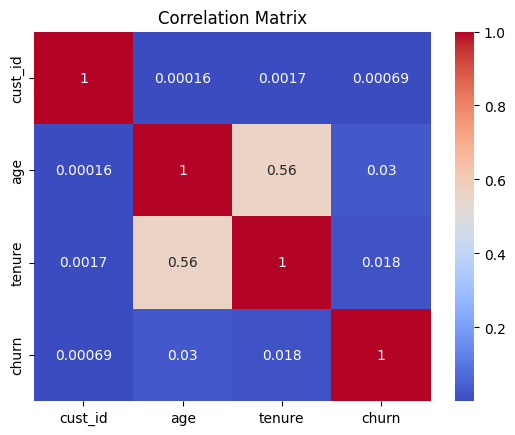

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numara = df_merged_info.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_merged_info[numara].corr()
display(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
categorical_cols = df_rfm_raw.select_dtypes(include=['object', 'category']).columns.tolist()
if 'cust_id' in categorical_cols:
    categorical_cols.remove('cust_id')
print("Identified categorical columns:")
print(categorical_cols)

Identified categorical columns:
['gender', 'province', 'religion', 'work_type', 'work_sector']


In [ ]:
churn_rates_by_category = {}

for col in categorical_cols:
    churn_rates = df_rfm_raw.groupby(col)['churn'].mean()
    churn_rates_by_category[col] = churn_rates

print("Churn rates by category:")
for col, rates in churn_rates_by_category.items():
    print(f"\n--- {col} ---")
    print(rates)

Churn rates by category:

--- gender ---
gender
F    0.139377
M    0.140462
Name: churn, dtype: float64

--- province ---
province
DRE    0.140883
FLE    0.130185
FRI    0.144108
GEL    0.141315
GRO    0.141470
LIM    0.145641
NOB    0.139481
NOH    0.140781
OVE    0.131780
UTR    0.138559
ZEE    0.152541
ZUI    0.138722
Name: churn, dtype: float64

--- religion ---
religion
C    0.137713
J    0.141782
M    0.136453
O    0.143953
U    0.140958
Name: churn, dtype: float64

--- work_type ---
work_type
Full-time        0.137615
Part-time        0.139505
Retired          0.163730
Self-employed    0.142126
Student          0.127638
Unemployed       0.133572
Name: churn, dtype: float64

--- work_sector ---
work_sector
Education        0.140753
Finance          0.139328
Healthcare       0.138004
Manufacturing    0.140100
Public Sector    0.137967
Retail           0.134727
Technology       0.140424
Name: churn, dtype: float64


Churn rate between categorical data

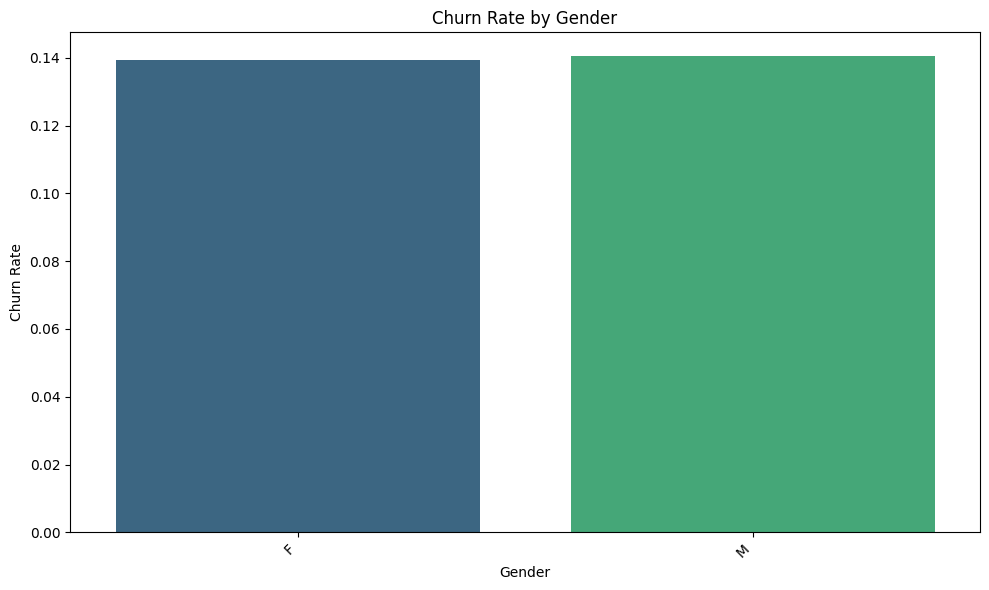

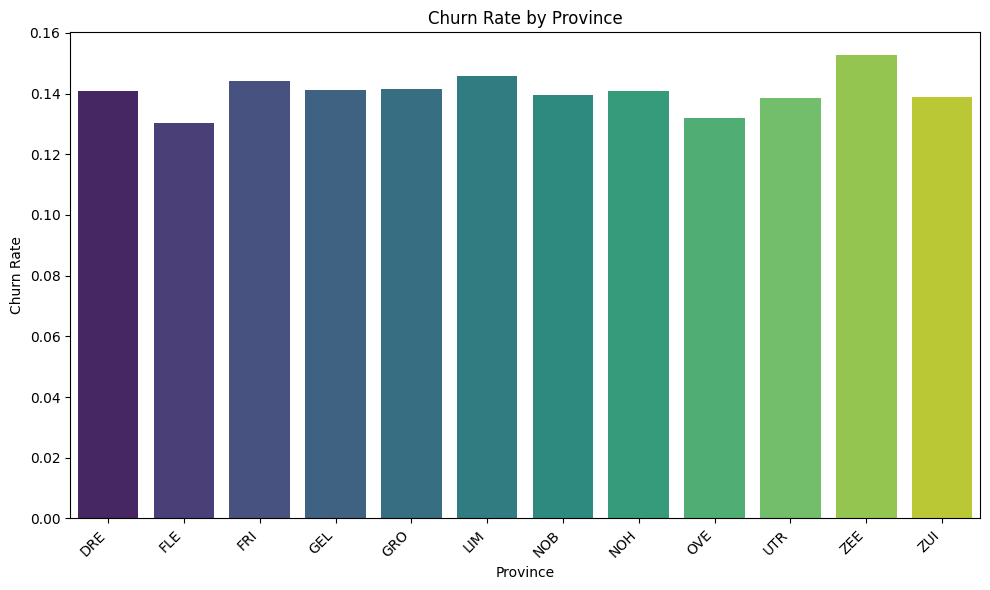

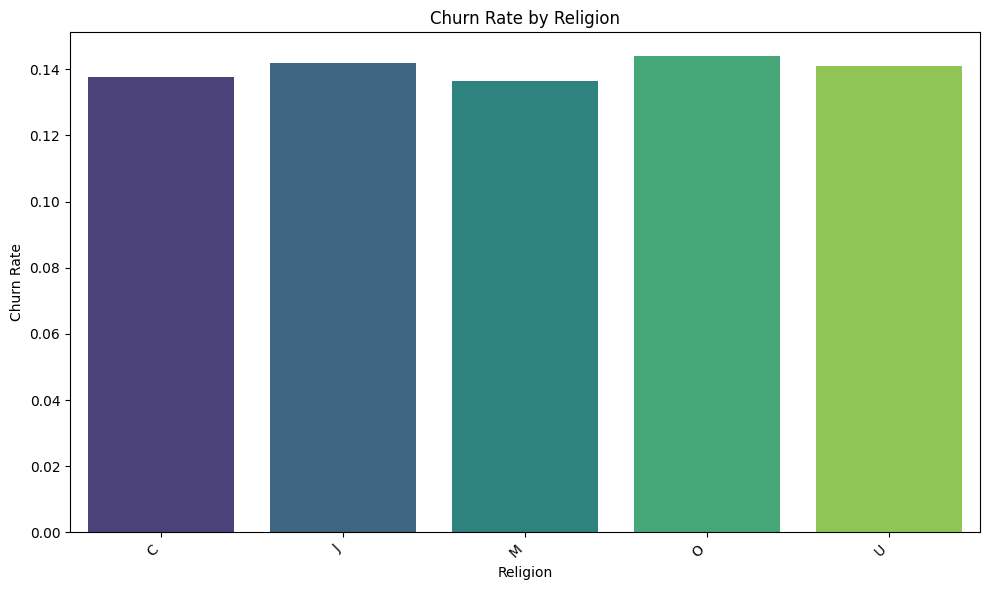

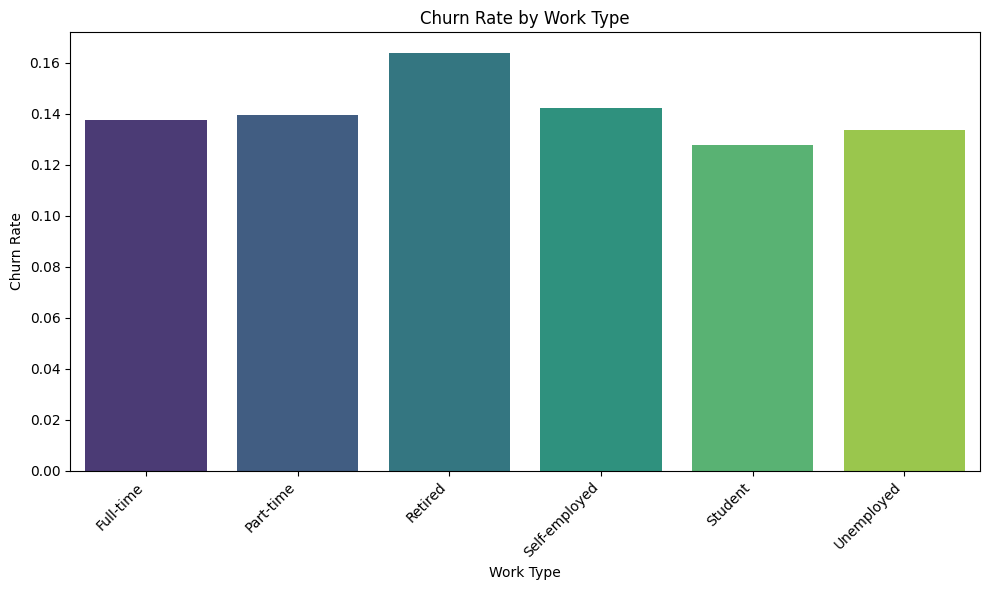

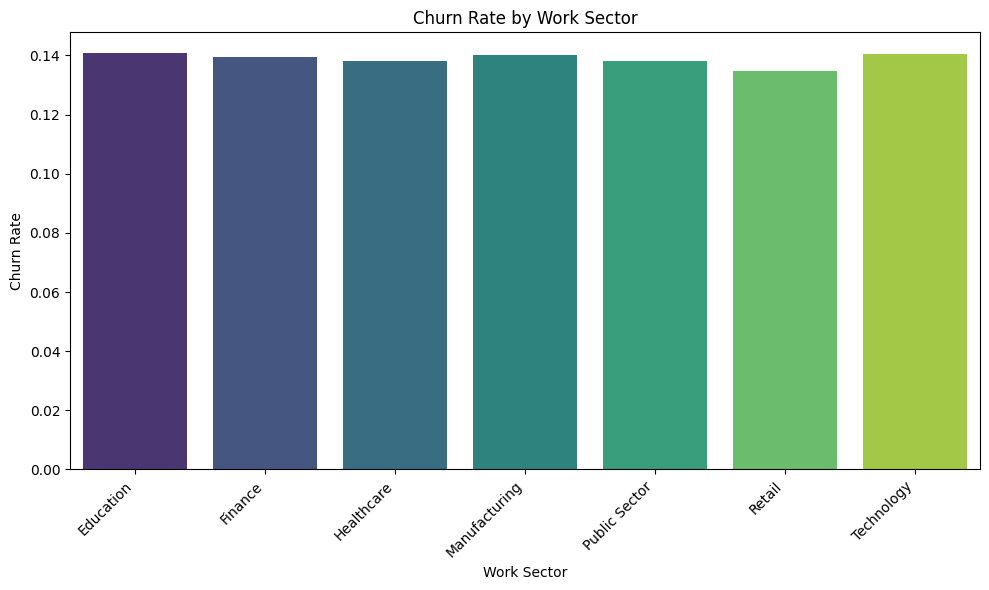

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col, rates in churn_rates_by_category.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=rates.index, y=rates.values, hue=rates.index, palette='viridis', legend=False)
    plt.title(f'Churn Rate by {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

We generate new average features from the cHistory data

In [ ]:
columns_to_aggregate = ['mobile_eft_all_cnt', 'mobile_eft_all_amt', 'cc_transaction_all_amt', 'cc_transaction_all_cnt', 'active_product_category_nbr']



df_cHistory_agg = df_cHistory.groupby('cust_id')[columns_to_aggregate].mean().reset_index()

df_cHistory_agg.rename(columns={
    'mobile_eft_all_cnt': 'avg_mobile_eft_all_cnt',
    'mobile_eft_all_amt': 'avg_mobile_eft_all_amt',
    'cc_transaction_all_amt': 'avg_cc_transaction_all_amt',
    'cc_transaction_all_cnt': 'avg_cc_transaction_all_cnt',
    'active_product_category_nbr': 'avg_active_product_category_nbr'
}, inplace=True)
display(df_cHistory_agg.head())


,cust_id,avg_mobile_eft_all_cnt,avg_mobile_eft_all_amt,avg_cc_transaction_all_amt,avg_cc_transaction_all_cnt,avg_active_product_category_nbr
0,0,2.238095,122.782857,NaN,NaN,2.047619
1,1,1.605263,17.424737,229.945263,14.289474,2.973684
2,2,2.351351,609.999189,9.323243,1.972973,2.837838
3,3,1.676471,72.665000,629.045882,24.558824,3.000000
4,5,2.555556,386.442593,91.887778,13.074074,2.000000


In [ ]:
df_merged_info_cleaned = df_merged_info.copy()

df_merged_info_cleaned = pd.merge(df_merged_info_cleaned, df_cHistory_agg, on='cust_id', how='left')

print("Updated df_merged_info_cleaned head:")
display(df_merged_info_cleaned.head())

print("\nUpdated df_merged_info_cleaned info:")
df_merged_info_cleaned.info()

Updated df_merged_info_cleaned head:


,cust_id,gender,age,province,religion,work_type,work_sector,tenure,ref_date,churn,avg_mobile_eft_all_cnt,avg_mobile_eft_all_amt,avg_cc_transaction_all_amt,avg_cc_transaction_all_cnt,avg_active_product_category_nbr
0,0,F,64,NOH,U,Part-time,Technology,135,2017-09-01,0,2.238095,122.782857,NaN,NaN,2.047619
1,3,F,22,ZUI,C,Student,NaN,47,2018-10-01,0,1.676471,72.665000,629.045882,24.558824,3.000000
2,5,M,27,ZUI,U,Full-time,Finance,108,2018-03-01,1,2.555556,386.442593,91.887778,13.074074,2.000000
3,6,F,40,NOH,U,Unemployed,NaN,187,2018-04-01,1,7.142857,546.809643,36.278571,5.607143,2.250000
4,7,F,64,GEL,U,Part-time,Public Sector,218,2018-05-01,0,0.793103,18.833793,2725.049310,65.482759,3.000000



Updated df_merged_info_cleaned info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133287 entries, 0 to 133286
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   cust_id                          133287 non-null  int64         
 1   gender                           133287 non-null  object        
 2   age                              133287 non-null  int64         
 3   province                         133287 non-null  object        
 4   religion                         133287 non-null  object        
 5   work_type                        133287 non-null  object        
 6   work_sector                      110520 non-null  object        
 7   tenure                           133287 non-null  int64         
 8   ref_date                         133287 non-null  datetime64[ns]
 9   churn                            133287 non-null  int64         
 10  avg_mo

We look for correlations of the new Features w churn.

/tmp/ipython-input-1486814413.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation_with_Churn', y='Feature', data=correlation_df, palette='viridis')


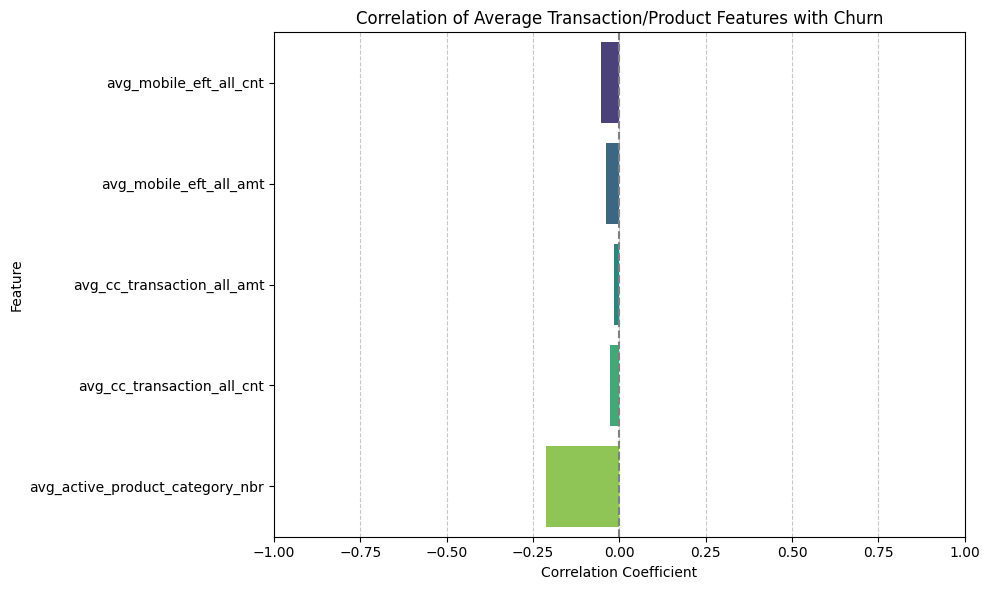

,churn
avg_mobile_eft_all_cnt,-0.053380
avg_mobile_eft_all_amt,-0.038222
avg_cc_transaction_all_amt,-0.016743
avg_cc_transaction_all_cnt,-0.027690
avg_active_product_category_nbr,-0.213119


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_features = [
    'avg_mobile_eft_all_cnt',
    'avg_mobile_eft_all_amt',
    'avg_cc_transaction_all_amt',
    'avg_cc_transaction_all_cnt',
    'avg_active_product_category_nbr'
]

correlations = df_merged_info_cleaned[correlation_features + ['churn']].corr()['churn'].drop('churn')

correlation_df = correlations.reset_index()
correlation_df.columns = ['Feature', 'Correlation_with_Churn']

plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation_with_Churn', y='Feature', data=correlation_df, palette='viridis')
plt.title('Correlation of Average Transaction/Product Features with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.xlim(-1, 1)
plt.axvline(0, color='grey', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
display(correlations)

In [ ]:
df_cHistory['date'] = pd.to_datetime(df_cHistory['date'])
df_cust_max_date = df_cHistory.groupby('cust_id')['date'].max().reset_index()
df_cust_max_date.rename(columns={'date': 'cust_max_date'}, inplace=True)

print("DataFrame with maximum dates per customer:")
display(df_cust_max_date.head())

DataFrame with maximum dates per customer:


,cust_id,cust_max_date
0,0,2017-09-01
1,1,2019-02-01
2,2,2019-01-01
3,3,2018-10-01
4,5,2018-03-01


In [ ]:
df_cHistory = pd.merge(df_cHistory, df_cust_max_date, on='cust_id', how='left')

print("df_cHistory head after merging cust_max_date:")
display(df_cHistory.head())
print("df_cHistory info after merging cust_max_date:")
df_cHistory.info()

df_cHistory head after merging cust_max_date:


,cust_id,date,mobile_eft_all_cnt,active_product_category_nbr,mobile_eft_all_amt,cc_transaction_all_amt,cc_transaction_all_cnt,cust_max_date
0,0,2016-01-01,1.0,2,151.20,NaN,NaN,2017-09-01
1,0,2016-02-01,1.0,2,178.70,NaN,NaN,2017-09-01
2,0,2016-03-01,2.0,2,37.38,NaN,NaN,2017-09-01
3,0,2016-04-01,4.0,2,100.90,NaN,NaN,2017-09-01
4,0,2016-05-01,3.0,3,132.28,NaN,NaN,2017-09-01


df_cHistory info after merging cust_max_date:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359609 entries, 0 to 5359608
Data columns (total 8 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   cust_id                      int64         
 1   date                         datetime64[ns]
 2   mobile_eft_all_cnt           float64       
 3   active_product_category_nbr  int64         
 4   mobile_eft_all_amt           float64       
 5   cc_transaction_all_amt       float64       
 6   cc_transaction_all_cnt       float64       
 7   cust_max_date                datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(2)
memory usage: 327.1 MB


Last 1 month amounts

In [ ]:
columns_to_aggregate = ['mobile_eft_all_cnt', 'mobile_eft_all_amt', 'cc_transaction_all_amt', 'cc_transaction_all_cnt', 'active_product_category_nbr']


df_last_1m = df_cHistory[df_cHistory['date'] > (df_cHistory['cust_max_date'] - pd.DateOffset(days=30))]
df_last_1m_agg = df_last_1m.groupby('cust_id')[columns_to_aggregate].mean().reset_index()
new_1m_cols = {col: f'avg_{col}_last_1m_from_max' for col in columns_to_aggregate}
df_last_1m_agg.rename(columns=new_1m_cols, inplace=True)

df_merged_info_cleaned = pd.merge(df_merged_info_cleaned, df_last_1m_agg, on='cust_id', how='left')

print("df_merged_info_cleaned head after adding 1-month features:")
display(df_merged_info_cleaned.head())

df_merged_info_cleaned head after adding 1-month features:


,cust_id,gender,age,province,religion,work_type,work_sector,tenure,ref_date,churn,avg_mobile_eft_all_cnt,avg_mobile_eft_all_amt,avg_cc_transaction_all_amt,avg_cc_transaction_all_cnt,avg_active_product_category_nbr,avg_mobile_eft_all_cnt_last_1m_from_max,avg_mobile_eft_all_amt_last_1m_from_max,avg_cc_transaction_all_amt_last_1m_from_max,avg_cc_transaction_all_cnt_last_1m_from_max,avg_active_product_category_nbr_last_1m_from_max
0,0,F,64,NOH,U,Part-time,Technology,135,2017-09-01,0,2.238095,122.782857,NaN,NaN,2.047619,1.0,212.750,NaN,NaN,2.0
1,3,F,22,ZUI,C,Student,NaN,47,2018-10-01,0,1.676471,72.665000,629.045882,24.558824,3.000000,2.0,498.990,1310.08,21.0,3.0
2,5,M,27,ZUI,U,Full-time,Finance,108,2018-03-01,1,2.555556,386.442593,91.887778,13.074074,2.000000,4.5,1056.895,12.30,2.5,2.0
3,6,F,40,NOH,U,Unemployed,NaN,187,2018-04-01,1,7.142857,546.809643,36.278571,5.607143,2.250000,6.0,262.550,11.06,1.0,2.0
4,7,F,64,GEL,U,Part-time,Public Sector,218,2018-05-01,0,0.793103,18.833793,2725.049310,65.482759,3.000000,0.0,0.000,2215.72,77.0,3.0


last 3 month amounts

In [ ]:
columns_to_aggregate = ['mobile_eft_all_cnt', 'mobile_eft_all_amt', 'cc_transaction_all_amt', 'cc_transaction_all_cnt', 'active_product_category_nbr']

df_last_3m = df_cHistory[df_cHistory['date'] > (df_cHistory['cust_max_date'] - pd.DateOffset(days=90))]
df_last_3m_agg = df_last_3m.groupby('cust_id')[columns_to_aggregate].mean().reset_index()
new_3m_cols = {col: f'avg_{col}_last_3m_from_max' for col in columns_to_aggregate}
df_last_3m_agg.rename(columns=new_3m_cols, inplace=True)

df_merged_info_cleaned = pd.merge(df_merged_info_cleaned, df_last_3m_agg, on='cust_id', how='left')

print("df_merged_info_cleaned head after adding 3-month features:")
display(df_merged_info_cleaned.head())

df_merged_info_cleaned head after adding 3-month features:


,cust_id,gender,age,province,religion,work_type,work_sector,tenure,ref_date,churn,...,avg_mobile_eft_all_cnt_last_1m_from_max,avg_mobile_eft_all_amt_last_1m_from_max,avg_cc_transaction_all_amt_last_1m_from_max,avg_cc_transaction_all_cnt_last_1m_from_max,avg_active_product_category_nbr_last_1m_from_max,avg_mobile_eft_all_cnt_last_3m_from_max,avg_mobile_eft_all_amt_last_3m_from_max,avg_cc_transaction_all_amt_last_3m_from_max,avg_cc_transaction_all_cnt_last_3m_from_max,avg_active_product_category_nbr_last_3m_from_max
0,0,F,64,NOH,U,Part-time,Technology,135,2017-09-01,0,...,1.0,212.750,NaN,NaN,2.0,1.666667,230.363333,NaN,NaN,2.0
1,3,F,22,ZUI,C,Student,NaN,47,2018-10-01,0,...,2.0,498.990,1310.08,21.0,3.0,1.333333,355.486667,1090.980000,19.333333,3.0
2,5,M,27,ZUI,U,Full-time,Finance,108,2018-03-01,1,...,4.5,1056.895,12.30,2.5,2.0,4.333333,1058.190000,13.076667,2.666667,2.0
3,6,F,40,NOH,U,Unemployed,NaN,187,2018-04-01,1,...,6.0,262.550,11.06,1.0,2.0,6.000000,330.063333,15.433333,1.666667,2.0
4,7,F,64,GEL,U,Part-time,Public Sector,218,2018-05-01,0,...,0.0,0.000,2215.72,77.0,3.0,0.000000,0.000000,1898.900000,73.000000,3.0


last 6 month amounts

In [ ]:
columns_to_aggregate = ['mobile_eft_all_cnt', 'mobile_eft_all_amt', 'cc_transaction_all_amt', 'cc_transaction_all_cnt', 'active_product_category_nbr']

df_last_6m = df_cHistory[df_cHistory['date'] > (df_cHistory['cust_max_date'] - pd.DateOffset(days=180))]
df_last_6m_agg = df_last_6m.groupby('cust_id')[columns_to_aggregate].mean().reset_index()
new_6m_cols = {col: f'avg_{col}_last_6m_from_max' for col in columns_to_aggregate}
df_last_6m_agg.rename(columns=new_6m_cols, inplace=True)

df_merged_info_cleaned = pd.merge(df_merged_info_cleaned, df_last_6m_agg, on='cust_id', how='left')

print("df_merged_info_cleaned head after adding 6-month features:")
display(df_merged_info_cleaned.head())

df_merged_info_cleaned head after adding 6-month features:


,cust_id,gender,age,province,religion,work_type,work_sector,tenure,ref_date,churn,...,avg_mobile_eft_all_cnt_last_3m_from_max,avg_mobile_eft_all_amt_last_3m_from_max,avg_cc_transaction_all_amt_last_3m_from_max,avg_cc_transaction_all_cnt_last_3m_from_max,avg_active_product_category_nbr_last_3m_from_max,avg_mobile_eft_all_cnt_last_6m_from_max,avg_mobile_eft_all_amt_last_6m_from_max,avg_cc_transaction_all_amt_last_6m_from_max,avg_cc_transaction_all_cnt_last_6m_from_max,avg_active_product_category_nbr_last_6m_from_max
0,0,F,64,NOH,U,Part-time,Technology,135,2017-09-01,0,...,1.666667,230.363333,NaN,NaN,2.0,2.000000,173.935000,NaN,NaN,2.000000
1,3,F,22,ZUI,C,Student,NaN,47,2018-10-01,0,...,1.333333,355.486667,1090.980000,19.333333,3.0,1.166667,258.471667,761.280000,20.000000,3.000000
2,5,M,27,ZUI,U,Full-time,Finance,108,2018-03-01,1,...,4.333333,1058.190000,13.076667,2.666667,2.0,3.833333,816.171667,14.975000,2.666667,2.000000
3,6,F,40,NOH,U,Unemployed,NaN,187,2018-04-01,1,...,6.000000,330.063333,15.433333,1.666667,2.0,5.166667,326.803333,14.988333,1.333333,2.166667
4,7,F,64,GEL,U,Part-time,Public Sector,218,2018-05-01,0,...,0.000000,0.000000,1898.900000,73.000000,3.0,0.000000,0.000000,1879.428333,74.333333,3.000000


In [ ]:
new_feature_suffixes = ['_last_1m_from_max', '_last_3m_from_max', '_last_6m_from_max']
all_new_feature_cols = []

for suffix in new_feature_suffixes:
    for col in columns_to_aggregate:
        all_new_feature_cols.append(f'avg_{col}{suffix}')


df_merged_info_cleaned[all_new_feature_cols] = df_merged_info_cleaned[all_new_feature_cols].fillna(0)

print("df_merged_info_cleaned head after filling NaNs in new features:")
display(df_merged_info_cleaned.head())

print("\ndf_merged_info_cleaned info after filling NaNs:")
df_merged_info_cleaned.info()

df_merged_info_cleaned head after filling NaNs in new features:


,cust_id,gender,age,province,religion,work_type,work_sector,tenure,ref_date,churn,...,avg_mobile_eft_all_cnt_last_3m_from_max,avg_mobile_eft_all_amt_last_3m_from_max,avg_cc_transaction_all_amt_last_3m_from_max,avg_cc_transaction_all_cnt_last_3m_from_max,avg_active_product_category_nbr_last_3m_from_max,avg_mobile_eft_all_cnt_last_6m_from_max,avg_mobile_eft_all_amt_last_6m_from_max,avg_cc_transaction_all_amt_last_6m_from_max,avg_cc_transaction_all_cnt_last_6m_from_max,avg_active_product_category_nbr_last_6m_from_max
0,0,F,64,NOH,U,Part-time,Technology,135,2017-09-01,0,...,1.666667,230.363333,0.000000,0.000000,2.0,2.000000,173.935000,0.000000,0.000000,2.000000
1,3,F,22,ZUI,C,Student,NaN,47,2018-10-01,0,...,1.333333,355.486667,1090.980000,19.333333,3.0,1.166667,258.471667,761.280000,20.000000,3.000000
2,5,M,27,ZUI,U,Full-time,Finance,108,2018-03-01,1,...,4.333333,1058.190000,13.076667,2.666667,2.0,3.833333,816.171667,14.975000,2.666667,2.000000
3,6,F,40,NOH,U,Unemployed,NaN,187,2018-04-01,1,...,6.000000,330.063333,15.433333,1.666667,2.0,5.166667,326.803333,14.988333,1.333333,2.166667
4,7,F,64,GEL,U,Part-time,Public Sector,218,2018-05-01,0,...,0.000000,0.000000,1898.900000,73.000000,3.0,0.000000,0.000000,1879.428333,74.333333,3.000000



df_merged_info_cleaned info after filling NaNs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133287 entries, 0 to 133286
Data columns (total 30 columns):
 #   Column                                            Non-Null Count   Dtype         
---  ------                                            --------------   -----         
 0   cust_id                                           133287 non-null  int64         
 1   gender                                            133287 non-null  object        
 2   age                                               133287 non-null  int64         
 3   province                                          133287 non-null  object        
 4   religion                                          133287 non-null  object        
 5   work_type                                         133287 non-null  object        
 6   work_sector                                       110520 non-null  object        
 7   tenure                                            13

/tmp/ipython-input-2740307370.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation_with_Churn', y='Feature', data=correlation_df_new, palette='viridis')


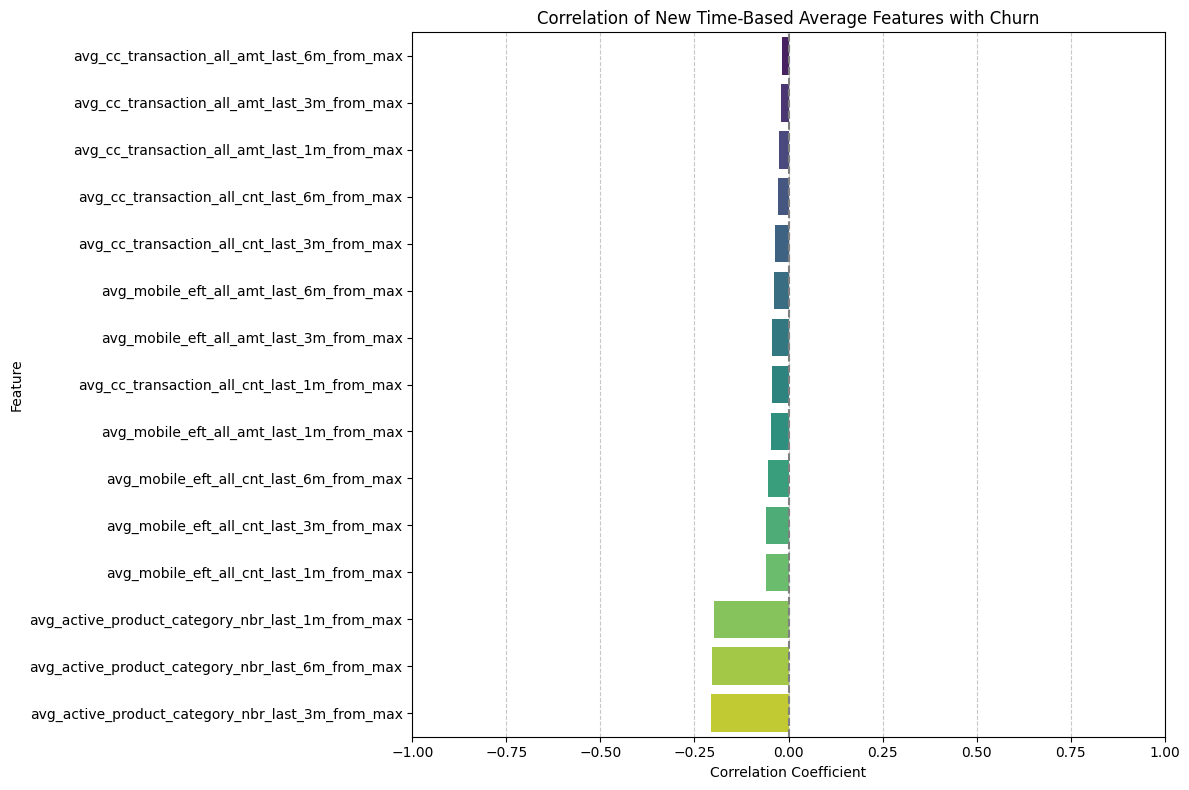

,churn
avg_mobile_eft_all_cnt_last_1m_from_max,-0.060908
avg_mobile_eft_all_amt_last_1m_from_max,-0.046541
avg_cc_transaction_all_amt_last_1m_from_max,-0.025502
avg_cc_transaction_all_cnt_last_1m_from_max,-0.043600
avg_active_product_category_nbr_last_1m_from_max,-0.198665
avg_mobile_eft_all_cnt_last_3m_from_max,-0.058627
avg_mobile_eft_all_amt_last_3m_from_max,-0.043404
avg_cc_transaction_all_amt_last_3m_from_max,-0.021161
avg_cc_transaction_all_cnt_last_3m_from_max,-0.035008
avg_active_product_category_nbr_last_3m_from_max,-0.204989


In [ ]:

correlation_features_new = all_new_feature_cols

correlations_new = df_merged_info_cleaned[correlation_features_new + ['churn']].corr()['churn'].drop('churn')

correlation_df_new = correlations_new.reset_index()
correlation_df_new.columns = ['Feature', 'Correlation_with_Churn']

correlation_df_new = correlation_df_new.sort_values(by='Correlation_with_Churn', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Correlation_with_Churn', y='Feature', data=correlation_df_new, palette='viridis')
plt.title('Correlation of New Time-Based Average Features with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.xlim(-1, 1)
plt.axvline(0, color='grey', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

display(correlations_new)

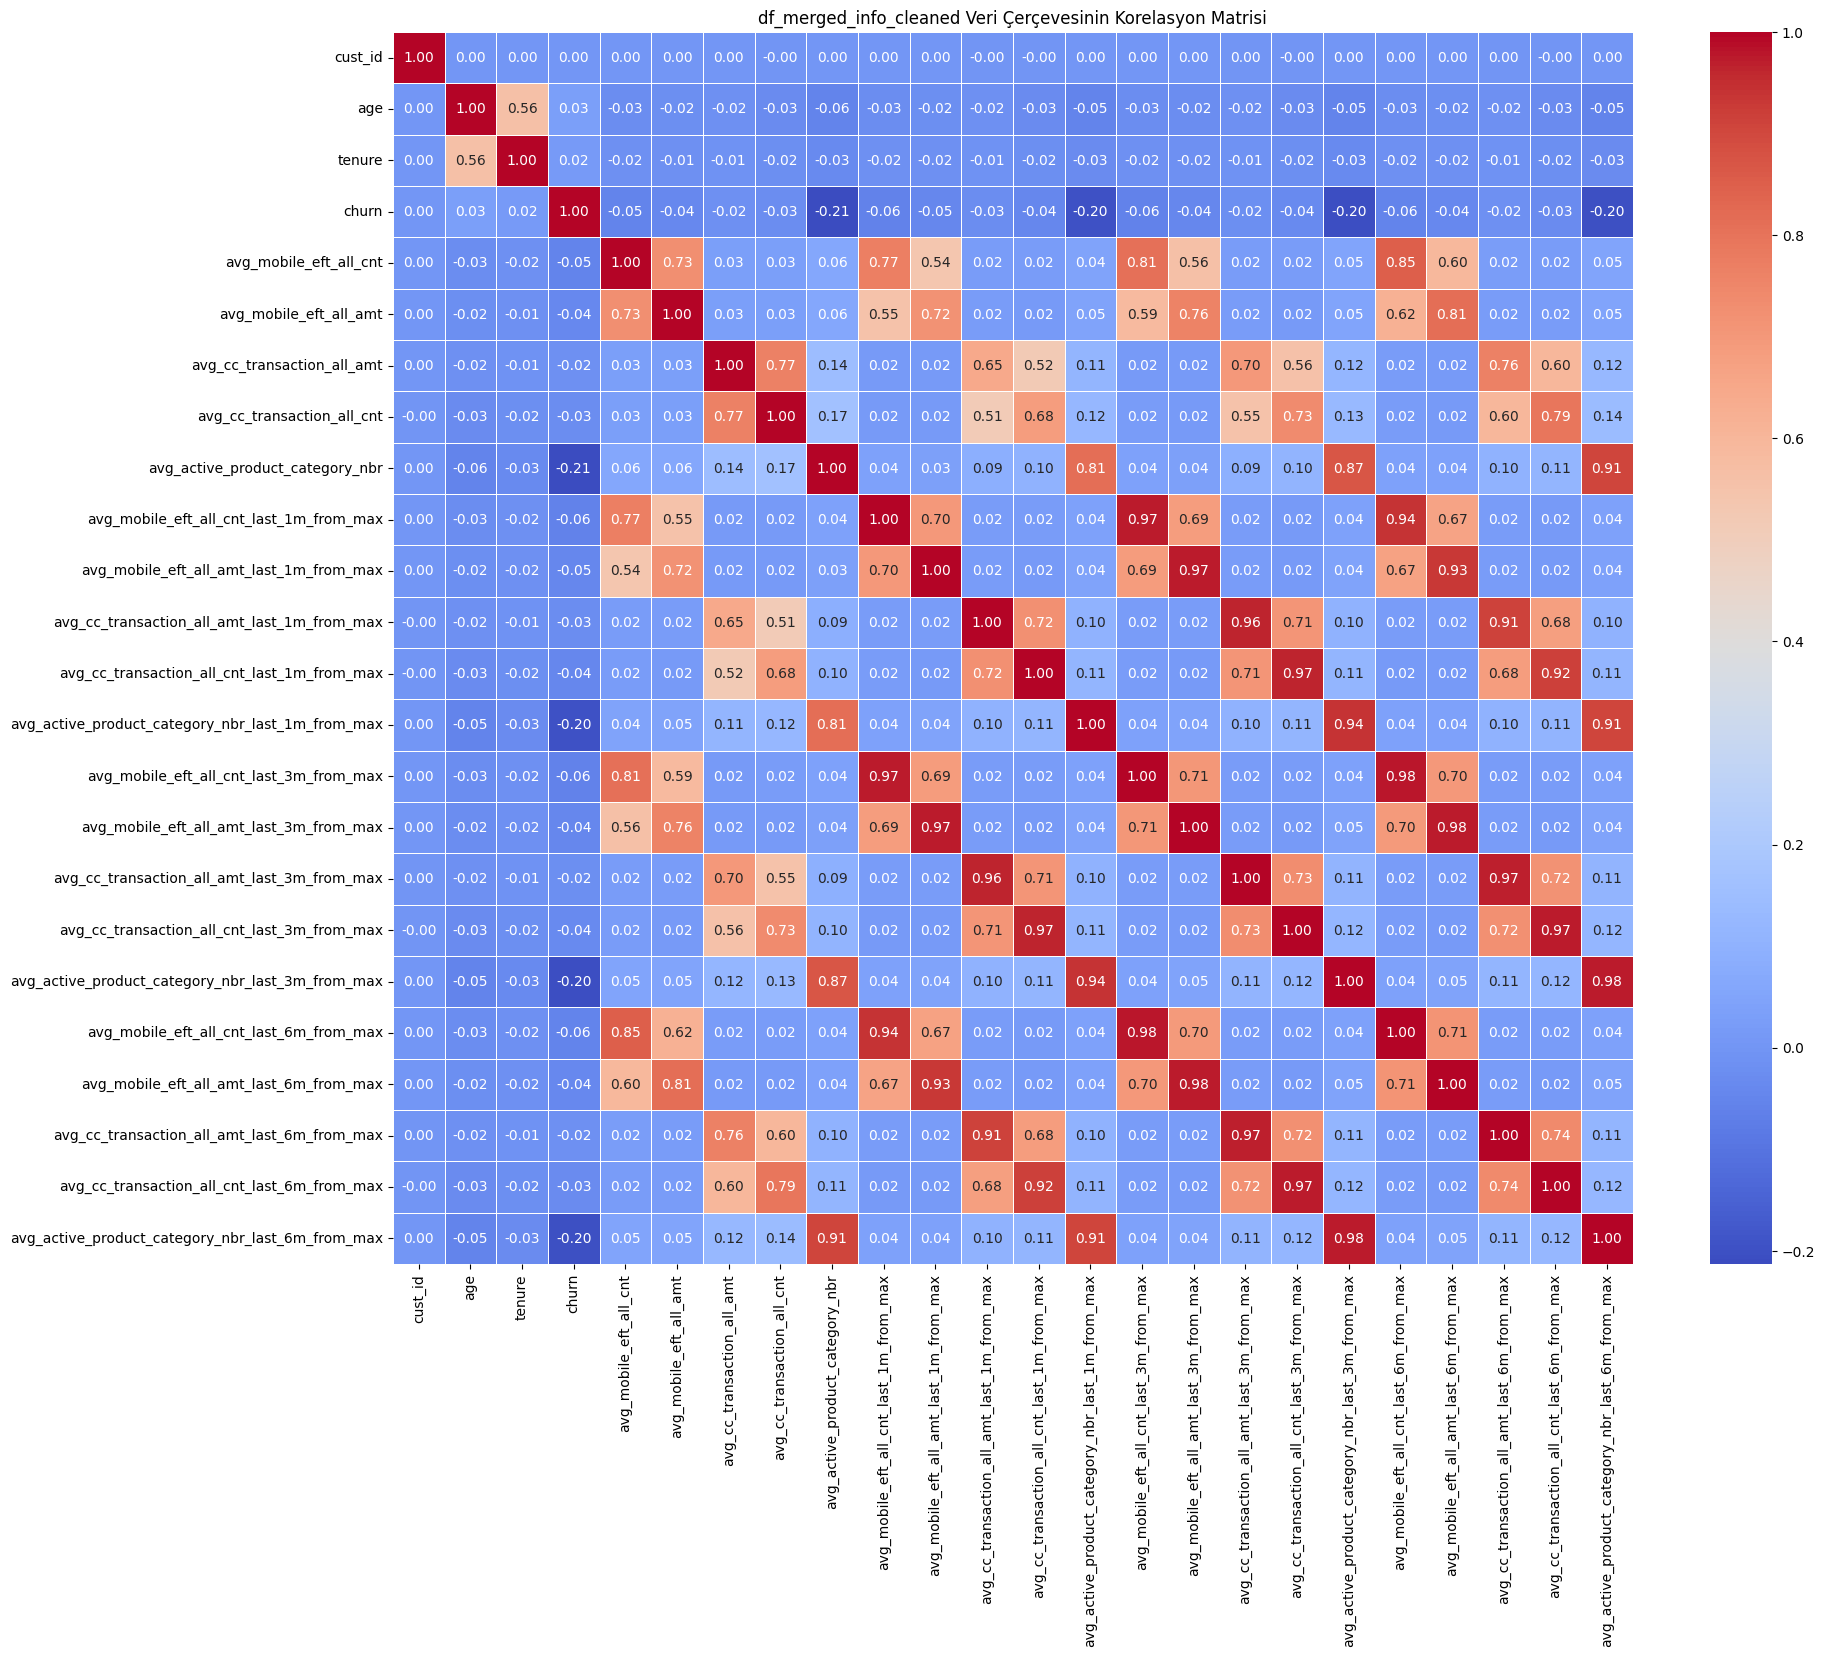

In [ ]:
correlation_matrix = df_merged_info_cleaned.corr(numeric_only=True)

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('df_merged_info_cleaned Veri Çerçevesinin Korelasyon Matrisi')
plt.show()

In [ ]:

df_monthly_activity = df_cHistory.set_index('date').groupby('cust_id')[['mobile_eft_all_cnt', 'cc_transaction_all_cnt']].resample('MS').sum().reset_index()
df_monthly_activity['is_inactive'] = (df_monthly_activity['mobile_eft_all_cnt'] == 0) & (df_monthly_activity['cc_transaction_all_cnt'] == 0)

print("Monthly Activity DataFrame:")
display(df_monthly_activity.head())
print("\nValue counts for is_inactive:")
print(df_monthly_activity['is_inactive'].value_counts())

Monthly Activity DataFrame:


,cust_id,date,mobile_eft_all_cnt,cc_transaction_all_cnt,is_inactive
0,0,2016-01-01,1.0,0.0,False
1,0,2016-02-01,1.0,0.0,False
2,0,2016-03-01,2.0,0.0,False
3,0,2016-04-01,4.0,0.0,False
4,0,2016-05-01,3.0,0.0,False



Value counts for is_inactive:
is_inactive
False    5277702
True       81907
Name: count, dtype: int64


In [ ]:
total_inactive_months = df_monthly_activity.groupby('cust_id')['is_inactive'].sum().rename('total_inactive_months')

df_monthly_activity = df_monthly_activity.sort_values(['cust_id', 'date'])
streak_change = (df_monthly_activity['is_inactive'] != df_monthly_activity['is_inactive'].shift()) | (df_monthly_activity['cust_id'] != df_monthly_activity['cust_id'].shift())
df_monthly_activity['streak_id'] = streak_change.cumsum()

inactive_streaks = df_monthly_activity[df_monthly_activity['is_inactive']]
if not inactive_streaks.empty:
    streak_lengths = inactive_streaks.groupby(['cust_id', 'streak_id']).size()
    max_consecutive_inactive_months = streak_lengths.groupby('cust_id').max().rename('max_consecutive_inactive_months')
else:
    max_consecutive_inactive_months = pd.Series(name='max_consecutive_inactive_months', dtype=int)

df_activity_w_dates = pd.merge(df_monthly_activity, df_cust_max_date[['cust_id', 'cust_max_date']], on='cust_id', how='left')

mask_recent = df_activity_w_dates['date'] > (df_activity_w_dates['cust_max_date'] - pd.DateOffset(months=6))
df_recent_activity = df_activity_w_dates[mask_recent]

inactive_days_last_6m = (df_recent_activity.groupby('cust_id')['is_inactive'].sum() * 30).rename('inactive_days_last_6m')

unique_customers = df_monthly_activity['cust_id'].unique()
df_inactivity_metrics = pd.DataFrame(index=unique_customers)
df_inactivity_metrics.index.name = 'cust_id'
df_inactivity_metrics = df_inactivity_metrics.join([total_inactive_months, max_consecutive_inactive_months, inactive_days_last_6m])
df_inactivity_metrics.fillna(0, inplace=True)
df_inactivity_metrics = df_inactivity_metrics.reset_index()
print("Inactivity Metrics DataFrame:")
display(df_inactivity_metrics.head())

Inactivity Metrics DataFrame:


,cust_id,total_inactive_months,max_consecutive_inactive_months,inactive_days_last_6m
0,0,0,0.0,0
1,1,0,0.0,0
2,2,0,0.0,0
3,3,0,0.0,0
4,5,0,0.0,0


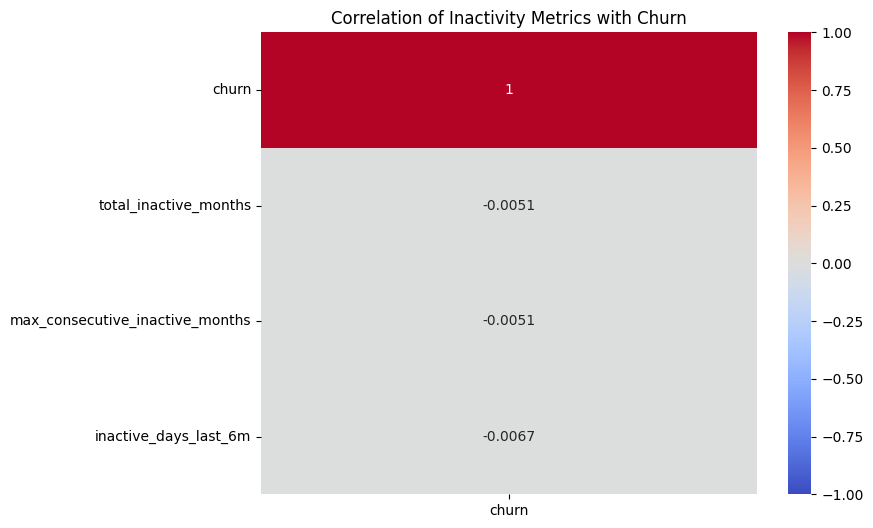

Correlations with Churn:


,churn
total_inactive_months,-0.005124
max_consecutive_inactive_months,-0.005141
inactive_days_last_6m,-0.006712


In [ ]:

df_merged_info_cleaned = pd.merge(df_merged_info_cleaned, df_inactivity_metrics, on='cust_id', how='left')
inactivity_features = ['total_inactive_months', 'max_consecutive_inactive_months', 'inactive_days_last_6m']
df_merged_info_cleaned[inactivity_features] = df_merged_info_cleaned[inactivity_features].fillna(0)
inactivity_corr = df_merged_info_cleaned[inactivity_features + ['churn']].corr()
plt.figure(figsize=(8, 6))

sns.heatmap(inactivity_corr[['churn']].sort_values(by='churn', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Inactivity Metrics with Churn')
plt.show()

print("Correlations with Churn:")
display(inactivity_corr['churn'].drop('churn').sort_values(ascending=False))

inactive features are unsuccesfull.

In [ ]:
columns_to_drop = ['total_inactive_months', 'max_consecutive_inactive_months', 'inactive_days_last_6m']
df_merged_info_cleaned.drop(columns=columns_to_drop, errors='ignore', inplace=True)


In [ ]:
df_monetary_freq = df_cHistory.groupby('cust_id')[['mobile_eft_all_cnt', 'cc_transaction_all_cnt', 'mobile_eft_all_amt', 'cc_transaction_all_amt']].sum().reset_index()

df_monetary_freq['Total_Frequency'] = df_monetary_freq['mobile_eft_all_cnt'] + df_monetary_freq['cc_transaction_all_cnt']
df_monetary_freq['Total_Monetary'] = df_monetary_freq['mobile_eft_all_amt'] + df_monetary_freq['cc_transaction_all_amt']

df_monetary_freq = df_monetary_freq[['cust_id', 'Total_Frequency', 'Total_Monetary']]

print("Total Frequency and Monetary Value per Customer:")
display(df_monetary_freq.head())

Total Frequency and Monetary Value per Customer:


,cust_id,Total_Frequency,Total_Monetary
0,0,47.0,2578.44
1,1,604.0,9400.06
2,2,160.0,22914.93
3,3,892.0,23858.17
4,5,422.0,12914.92


In [ ]:
df_merged_info_cleaned = pd.merge(df_merged_info_cleaned, df_monetary_freq, on='cust_id', how='left')

df_merged_info_cleaned['Total_Frequency'] = df_merged_info_cleaned['Total_Frequency'].fillna(0)
df_merged_info_cleaned['Total_Monetary'] = df_merged_info_cleaned['Total_Monetary'].fillna(0)

print("df_merged_info_cleaned head after merging monetary and frequency metrics:")
display(df_merged_info_cleaned.head())

df_merged_info_cleaned head after merging monetary and frequency metrics:


,cust_id,gender,age,province,religion,work_type,work_sector,tenure,ref_date,churn,...,avg_cc_transaction_all_amt_last_3m_from_max,avg_cc_transaction_all_cnt_last_3m_from_max,avg_active_product_category_nbr_last_3m_from_max,avg_mobile_eft_all_cnt_last_6m_from_max,avg_mobile_eft_all_amt_last_6m_from_max,avg_cc_transaction_all_amt_last_6m_from_max,avg_cc_transaction_all_cnt_last_6m_from_max,avg_active_product_category_nbr_last_6m_from_max,Total_Frequency,Total_Monetary
0,0,F,64,NOH,U,Part-time,Technology,135,2017-09-01,0,...,0.000000,0.000000,2.0,2.000000,173.935000,0.000000,0.000000,2.000000,47.0,2578.44
1,3,F,22,ZUI,C,Student,NaN,47,2018-10-01,0,...,1090.980000,19.333333,3.0,1.166667,258.471667,761.280000,20.000000,3.000000,892.0,23858.17
2,5,M,27,ZUI,U,Full-time,Finance,108,2018-03-01,1,...,13.076667,2.666667,2.0,3.833333,816.171667,14.975000,2.666667,2.000000,422.0,12914.92
3,6,F,40,NOH,U,Unemployed,NaN,187,2018-04-01,1,...,15.433333,1.666667,2.0,5.166667,326.803333,14.988333,1.333333,2.166667,357.0,16326.47
4,7,F,64,GEL,U,Part-time,Public Sector,218,2018-05-01,0,...,1898.900000,73.000000,3.0,0.000000,0.000000,1879.428333,74.333333,3.000000,1922.0,79572.61


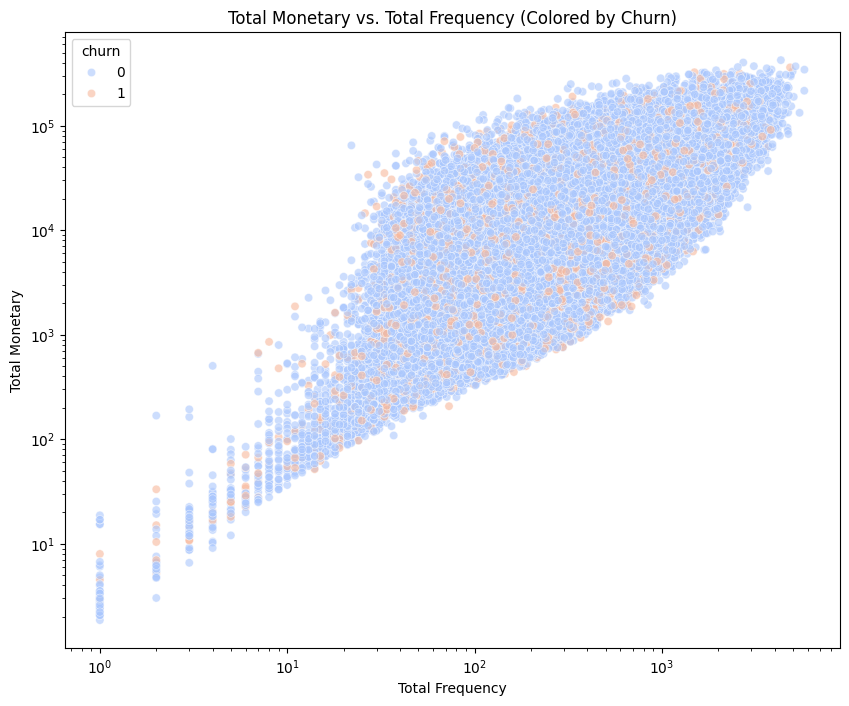

In [ ]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Total_Frequency', y='Total_Monetary', hue='churn', data=df_merged_info_cleaned, palette='coolwarm', alpha=0.6)
plt.title('Total Monetary vs. Total Frequency (Colored by Churn)')
plt.xlabel('Total Frequency')
plt.ylabel('Total Monetary')
plt.xscale('log')
plt.yscale('log')
plt.show()

We were not earn any result from frequency and monatery in RFM analysis. So we are going with Recency

In [ ]:
columns_to_drop = ['Total_Frequency', 'Total_Monetary']
df_merged_info_cleaned.drop(columns=columns_to_drop, errors='ignore', inplace=True)

In [ ]:
display(df_merged_info_cleaned.head())

,cust_id,gender,age,province,religion,work_type,work_sector,tenure,ref_date,churn,...,avg_mobile_eft_all_cnt_last_3m_from_max,avg_mobile_eft_all_amt_last_3m_from_max,avg_cc_transaction_all_amt_last_3m_from_max,avg_cc_transaction_all_cnt_last_3m_from_max,avg_active_product_category_nbr_last_3m_from_max,avg_mobile_eft_all_cnt_last_6m_from_max,avg_mobile_eft_all_amt_last_6m_from_max,avg_cc_transaction_all_amt_last_6m_from_max,avg_cc_transaction_all_cnt_last_6m_from_max,avg_active_product_category_nbr_last_6m_from_max
0,0,F,64,NOH,U,Part-time,Technology,135,2017-09-01,0,...,1.666667,230.363333,0.000000,0.000000,2.0,2.000000,173.935000,0.000000,0.000000,2.000000
1,3,F,22,ZUI,C,Student,NaN,47,2018-10-01,0,...,1.333333,355.486667,1090.980000,19.333333,3.0,1.166667,258.471667,761.280000,20.000000,3.000000
2,5,M,27,ZUI,U,Full-time,Finance,108,2018-03-01,1,...,4.333333,1058.190000,13.076667,2.666667,2.0,3.833333,816.171667,14.975000,2.666667,2.000000
3,6,F,40,NOH,U,Unemployed,NaN,187,2018-04-01,1,...,6.000000,330.063333,15.433333,1.666667,2.0,5.166667,326.803333,14.988333,1.333333,2.166667
4,7,F,64,GEL,U,Part-time,Public Sector,218,2018-05-01,0,...,0.000000,0.000000,1898.900000,73.000000,3.0,0.000000,0.000000,1879.428333,74.333333,3.000000


Graphs for visualizing the binary relations.

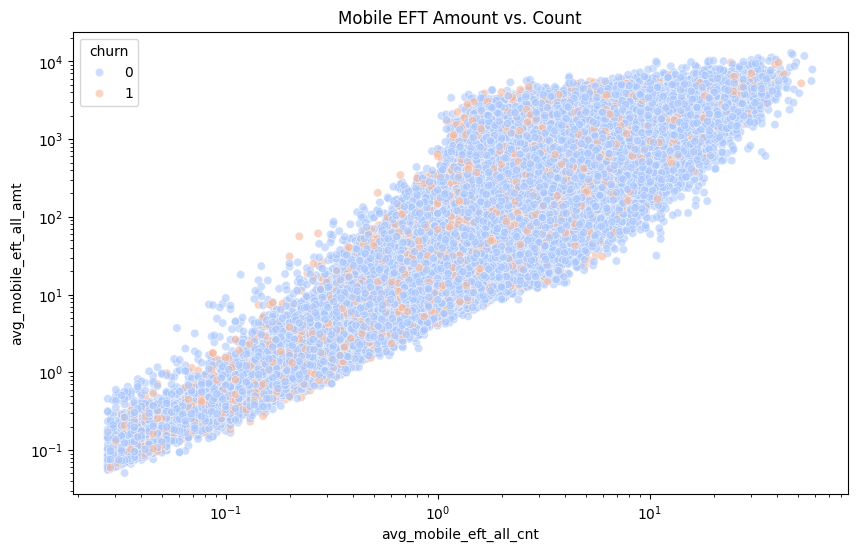

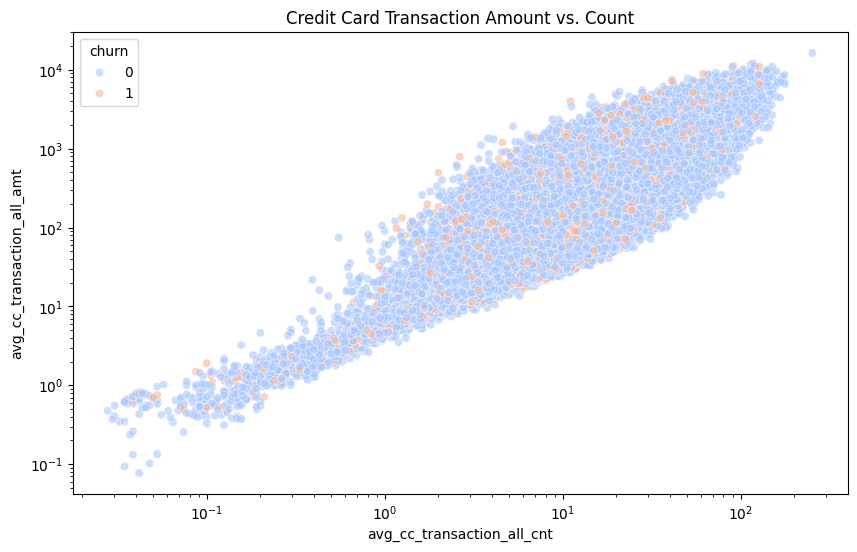

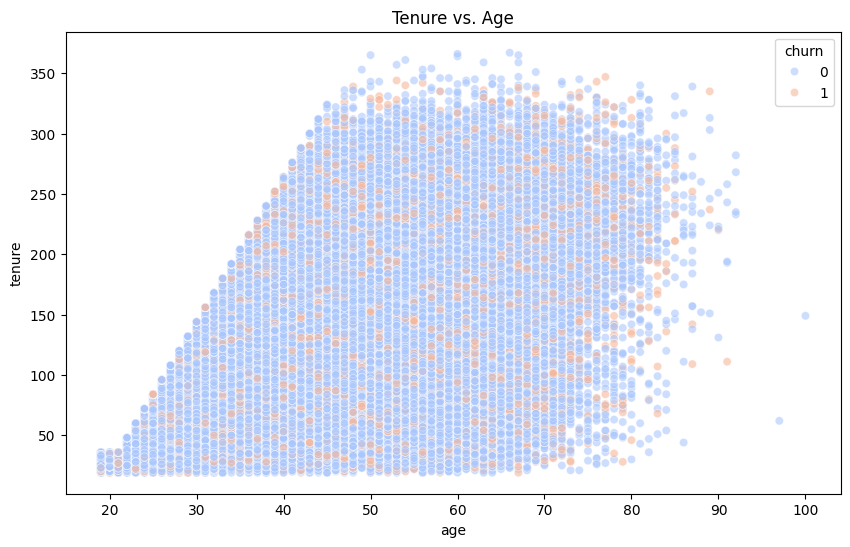

In [ ]:

# 1. Mobile EFT Amount vs. Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_info_cleaned, x='avg_mobile_eft_all_cnt', y='avg_mobile_eft_all_amt', hue='churn', alpha=0.6, palette='coolwarm')
plt.xscale('log')
plt.yscale('log')
plt.title('Mobile EFT Amount vs. Count')
plt.show()

# 2. Credit Card Transaction Amount vs. Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_info_cleaned, x='avg_cc_transaction_all_cnt', y='avg_cc_transaction_all_amt', hue='churn', alpha=0.6, palette='coolwarm')
plt.xscale('log')
plt.yscale('log')
plt.title('Credit Card Transaction Amount vs. Count')
plt.show()

# 3. Tenure vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_info_cleaned, x='age', y='tenure', hue='churn', alpha=0.6, palette='coolwarm')
plt.title('Tenure vs. Age')
plt.show()

# **Selecting Our Features**

In [ ]:
numerical_cols = df_merged_info_cleaned.select_dtypes(include=['number']).columns
churn_correlations = df_merged_info_cleaned[numerical_cols].corr()['churn']

# Exclude 'churn' and 'cust_id'
churn_correlations = churn_correlations.drop(['churn', 'cust_id'], errors='ignore')

# Sort in descending order
sorted_churn_correlations = churn_correlations.sort_values(ascending=False)

print("Pearson correlations with 'churn' (sorted descending):")
display(sorted_churn_correlations)

Pearson correlations with 'churn' (sorted descending):


,churn
age,0.030268
tenure,0.018389
avg_cc_transaction_all_amt,-0.016743
avg_cc_transaction_all_amt_last_6m_from_max,-0.017787
avg_cc_transaction_all_amt_last_3m_from_max,-0.021161
avg_cc_transaction_all_amt_last_1m_from_max,-0.025502
avg_cc_transaction_all_cnt,-0.027690
avg_cc_transaction_all_cnt_last_6m_from_max,-0.028831
avg_cc_transaction_all_cnt_last_3m_from_max,-0.035008
avg_mobile_eft_all_amt,-0.038222


In [ ]:
categorical_cols = ['gender', 'province', 'religion', 'work_type', 'work_sector']

print(f"Global Churn Rate: {df_merged_info_cleaned['churn'].mean():.4f}\n")

for col in categorical_cols:
    if col in df_merged_info_cleaned.columns:
        print(f"--- Churn Rates by {col} ---")
        churn_rates = df_merged_info_cleaned.groupby(col)['churn'].mean().sort_values(ascending=False)
        display(churn_rates)
        print("\n")

Global Churn Rate: 0.1416

--- Churn Rates by gender ---


,churn
gender,
M,0.142270
F,0.140912




--- Churn Rates by province ---


,churn
province,
ZEE,0.153089
LIM,0.147814
FRI,0.145188
GEL,0.143160
NOH,0.142773
DRE,0.142706
GRO,0.141865
NOB,0.141195
ZUI,0.140465




--- Churn Rates by religion ---


,churn
religion,
O,0.146285
J,0.143316
U,0.142578
C,0.139284
M,0.138097




--- Churn Rates by work_type ---


,churn
work_type,
Retired,0.165503
Self-employed,0.143544
Part-time,0.140862
Full-time,0.139546
Unemployed,0.134650
Student,0.129381




--- Churn Rates by work_sector ---


,churn
work_sector,
Manufacturing,0.143201
Education,0.142288
Technology,0.141239
Public Sector,0.140565
Finance,0.140171
Healthcare,0.140008
Retail,0.135764


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# 1. Select numerical features
numerical_cols = df_merged_info_cleaned.select_dtypes(include=['number']).columns.tolist()
cols_to_exclude = ['cust_id', 'churn']
numerical_features = [col for col in numerical_cols if col not in cols_to_exclude]

print("Selected numerical features for PCA:")
print(numerical_features)

# Handle missing values before scaling (assuming 0 for missing transaction data)
X = df_merged_info_cleaned[numerical_features].fillna(0)

# 2. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Output explained variance to check
print("\nExplained Variance Ratio (First 10 components):")
print(pca.explained_variance_ratio_[:10])
print("\nCumulative Explained Variance (First 10 components):")
print(np.cumsum(pca.explained_variance_ratio_)[:10])

Selected numerical features for PCA:
['age', 'tenure', 'avg_mobile_eft_all_cnt', 'avg_mobile_eft_all_amt', 'avg_cc_transaction_all_amt', 'avg_cc_transaction_all_cnt', 'avg_active_product_category_nbr', 'avg_mobile_eft_all_cnt_last_1m_from_max', 'avg_mobile_eft_all_amt_last_1m_from_max', 'avg_cc_transaction_all_amt_last_1m_from_max', 'avg_cc_transaction_all_cnt_last_1m_from_max', 'avg_active_product_category_nbr_last_1m_from_max', 'avg_mobile_eft_all_cnt_last_3m_from_max', 'avg_mobile_eft_all_amt_last_3m_from_max', 'avg_cc_transaction_all_amt_last_3m_from_max', 'avg_cc_transaction_all_cnt_last_3m_from_max', 'avg_active_product_category_nbr_last_3m_from_max', 'avg_mobile_eft_all_cnt_last_6m_from_max', 'avg_mobile_eft_all_amt_last_6m_from_max', 'avg_cc_transaction_all_amt_last_6m_from_max', 'avg_cc_transaction_all_cnt_last_6m_from_max', 'avg_active_product_category_nbr_last_6m_from_max']

Explained Variance Ratio (First 10 components):
[0.295962   0.27617056 0.16120252 0.07056157 0.046716

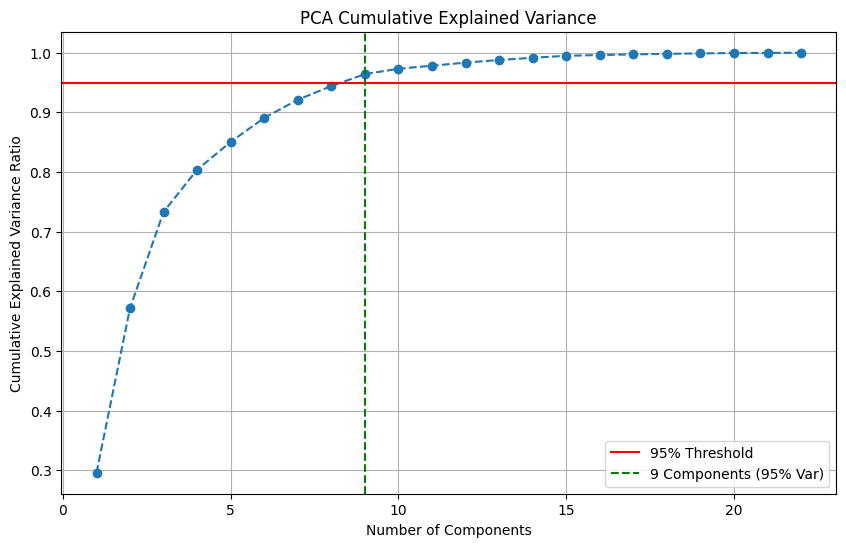

Number of components needed to explain 95% of the variance: 9

Explained Variance Ratio per Component:
PC1: 0.2960
PC2: 0.2762
PC3: 0.1612
PC4: 0.0706
PC5: 0.0467
PC6: 0.0402
PC7: 0.0303
PC8: 0.0230
PC9: 0.0200
PC10: 0.0090
PC11: 0.0052
PC12: 0.0050
PC13: 0.0045
PC14: 0.0037
PC15: 0.0033
PC16: 0.0013
PC17: 0.0011
PC18: 0.0009
PC19: 0.0007
PC20: 0.0007
PC21: 0.0003
PC22: 0.0002


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components required to explain 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

# Plot Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Threshold')
plt.axvline(x=n_components_95, color='g', linestyle='--', label=f'{n_components_95} Components (95% Var)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

print(f"Number of components needed to explain 95% of the variance: {n_components_95}")

print("\nExplained Variance Ratio per Component:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f}")

# Eleminatting the smallet correlations between churn

In [ ]:
columns_to_drop = ['avg_cc_transaction_all_amt_last_6m_from_max', 'avg_cc_transaction_all_amt', 'tenure','avg_active_product_category_nbr_last_1m_from_max']
df_merged_info_cleaned.drop(columns=columns_to_drop, errors='ignore', inplace=True)

In [ ]:
columns_to_drop = ['gender', 'religion']
df_merged_info_cleaned.drop(columns=columns_to_drop, errors='ignore', inplace=True)

And eleminating the features that have correlations

In [ ]:
import numpy as np
current_numerical_cols = df_merged_info_cleaned.select_dtypes(include=['number']).columns.tolist()
if 'cust_id' in current_numerical_cols:
    current_numerical_cols.remove('cust_id')
correlation_matrix = df_merged_info_cleaned[current_numerical_cols].corr().abs()

highly_correlated_features_to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        if col1 == 'churn' or col2 == 'churn':
            continue

        if correlation_matrix.iloc[i, j] > 0.80:
            corr_with_churn_col1 = correlation_matrix.loc[col1, 'churn']
            corr_with_churn_col2 = correlation_matrix.loc[col2, 'churn']

            if corr_with_churn_col1 < corr_with_churn_col2:
                highly_correlated_features_to_drop.add(col1)
            else:
                highly_correlated_features_to_drop.add(col2)
highly_correlated_features_to_drop = [col for col in highly_correlated_features_to_drop if col != 'churn']

print("Features identified for dropping due to high inter-correlation and lower correlation with churn:")
for feature in highly_correlated_features_to_drop:
    print(f"- {feature}")
df_m=df_merged_info_cleaned.copy()
df_m.drop(columns=highly_correlated_features_to_drop, errors='ignore', inplace=True)

print("\nUpdated df_merged_info_cleaned head after dropping features:")
display(df_m.head())

print("\nUpdated df_merged_info_cleaned info:")
df_m.info()

Features identified for dropping due to high inter-correlation and lower correlation with churn:
- avg_cc_transaction_all_cnt_last_3m_from_max
- avg_mobile_eft_all_cnt_last_3m_from_max
- avg_mobile_eft_all_cnt_last_6m_from_max
- avg_mobile_eft_all_amt_last_3m_from_max
- avg_mobile_eft_all_cnt
- avg_mobile_eft_all_amt
- avg_active_product_category_nbr_last_6m_from_max
- avg_mobile_eft_all_amt_last_6m_from_max
- avg_cc_transaction_all_amt_last_3m_from_max
- avg_cc_transaction_all_cnt_last_6m_from_max
- avg_active_product_category_nbr_last_3m_from_max

Updated df_merged_info_cleaned head after dropping features:


,cust_id,age,province,work_type,work_sector,ref_date,churn,avg_cc_transaction_all_cnt,avg_active_product_category_nbr,avg_mobile_eft_all_cnt_last_1m_from_max,avg_mobile_eft_all_amt_last_1m_from_max,avg_cc_transaction_all_amt_last_1m_from_max,avg_cc_transaction_all_cnt_last_1m_from_max
0,0,64,NOH,Part-time,Technology,2017-09-01,0,NaN,2.047619,1.0,212.750,0.00,0.0
1,3,22,ZUI,Student,NaN,2018-10-01,0,24.558824,3.000000,2.0,498.990,1310.08,21.0
2,5,27,ZUI,Full-time,Finance,2018-03-01,1,13.074074,2.000000,4.5,1056.895,12.30,2.5
3,6,40,NOH,Unemployed,NaN,2018-04-01,1,5.607143,2.250000,6.0,262.550,11.06,1.0
4,7,64,GEL,Part-time,Public Sector,2018-05-01,0,65.482759,3.000000,0.0,0.000,2215.72,77.0



Updated df_merged_info_cleaned info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133287 entries, 0 to 133286
Data columns (total 13 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   cust_id                                      133287 non-null  int64         
 1   age                                          133287 non-null  int64         
 2   province                                     133287 non-null  object        
 3   work_type                                    133287 non-null  object        
 4   work_sector                                  110520 non-null  object        
 5   ref_date                                     133287 non-null  datetime64[ns]
 6   churn                                        133287 non-null  int64         
 7   avg_cc_transaction_all_cnt                   129304 non-null  float64       
 8   avg_active_product_categor

### 1. Data Preparation for XGBoost

XGBoost works best with numerical input. Therefore, we need to apply one-hot encoding to our categorical features. We will use `ColumnTransformer` to apply this transformation to `X_train` and `X_test` consistently.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_feature_names)
    ],
    remainder='passthrough'
)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

feature_names_encoded = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_feature_names).tolist() + \
                        [col for col in X_train.columns if col not in categorical_feature_names]

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=feature_names_encoded, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=feature_names_encoded, index=X_test.index)

print("Shape of X_train after one-hot encoding:", X_train_encoded_df.shape)
print("Shape of X_test after one-hot encoding:", X_test_encoded_df.shape)

neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight = neg_count / pos_count

print(f"\nScale Pos Weight (for XGBoost imbalance handling): {scale_pos_weight:.2f}")

Shape of X_train after one-hot encoding: (106629, 35)
Shape of X_test after one-hot encoding: (26658, 35)

Scale Pos Weight (for XGBoost imbalance handling): 6.06


### 2. XGBoost Model Training

Now we will initialize and train an `XGBClassifier`. We will pass the `scale_pos_weight` parameter to address the class imbalance, similar to how we used `class_weights` with CatBoost.

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='auc',            # Evaluation metric
    use_label_encoder=False,      # Suppress warning
    random_state=42,              # For reproducibility
    n_estimators=500,             # Number of boosting rounds
    learning_rate=0.1,            # Step size shrinkage
    max_depth=6,                  # Maximum depth of a tree
    subsample=0.8,                # Subsample ratio of the training instance
    colsample_bytree=0.8,         # Subsample ratio of columns when constructing each tree
    scale_pos_weight=scale_pos_weight, # Handle class imbalance
    tree_method='hist'            # Use histogram-based algorithm for faster training
)

xgb_model.fit(X_train_encoded_df, y_train,
              eval_set=[(X_test_encoded_df, y_test)],
              verbose=False
             )

print("\nXGBoost model training complete!")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [00:54:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost model training complete!


### 3. XGBoost Model Evaluation

Let's evaluate the performance of the trained XGBoost model on the test set using various classification metrics.


XGBoost Model Evaluation on Test Set:
Accuracy:  0.6627
Precision: 0.2294
Recall:    0.5859
F1-Score:  0.3297
ROC AUC:   0.6898


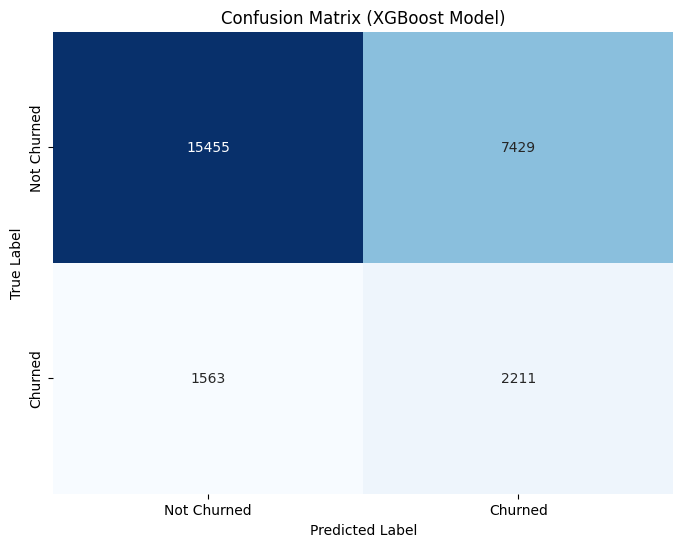

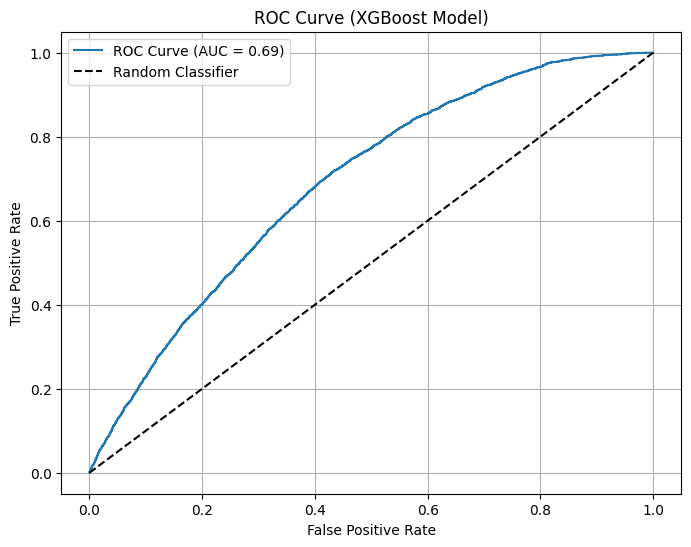

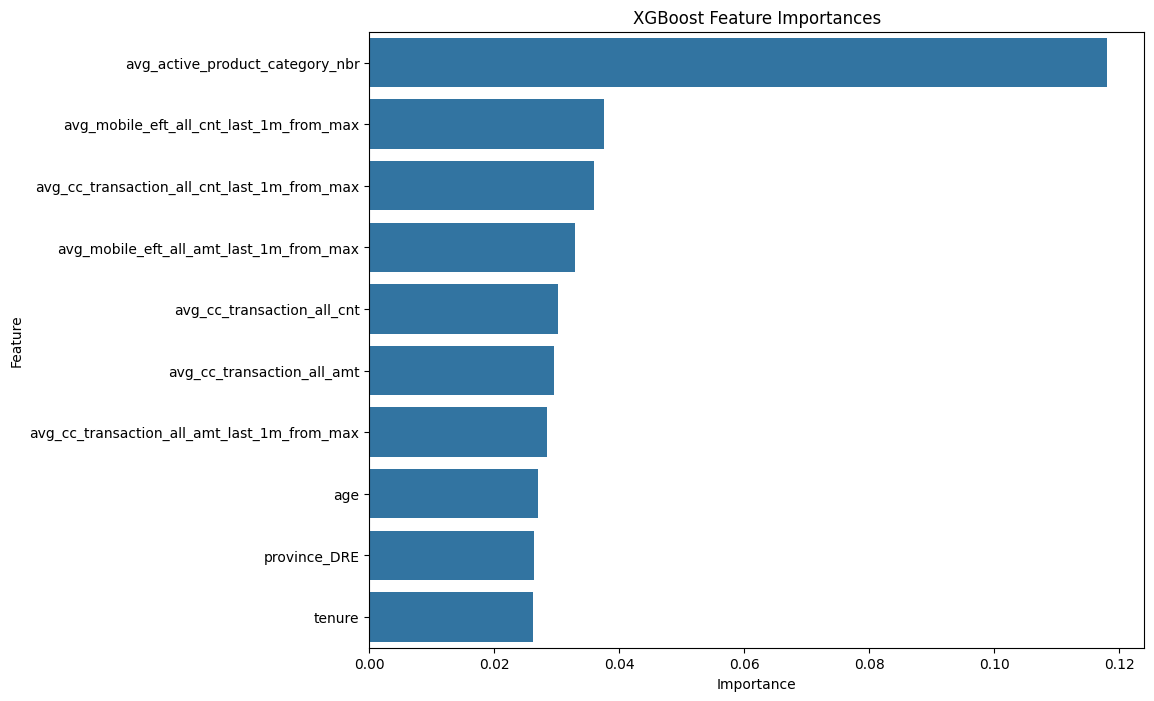

,feature,importance
30,avg_active_product_category_nbr,0.118093
31,avg_mobile_eft_all_cnt_last_1m_from_max,0.037523
34,avg_cc_transaction_all_cnt_last_1m_from_max,0.035923
32,avg_mobile_eft_all_amt_last_1m_from_max,0.032909
29,avg_cc_transaction_all_cnt,0.030129
28,avg_cc_transaction_all_amt,0.029489
33,avg_cc_transaction_all_amt_last_1m_from_max,0.028515
26,age,0.027070
0,province_DRE,0.026435
27,tenure,0.026256


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


y_pred_xgb = xgb_model.predict(X_test_encoded_df)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_encoded_df)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print(f"\nXGBoost Model Evaluation on Test Set:")
print(f"Accuracy:  {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall:    {recall_xgb:.4f}")
print(f"F1-Score:  {f1_xgb:.4f}")
print(f"ROC AUC:   {roc_auc_xgb:.4f}")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix (XGBoost Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve for XGBoost model
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC Curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost Model)')
plt.legend()
plt.grid()
plt.show()

# Feature Importances for XGBoost model
feature_importances_xgb = pd.DataFrame({'feature': feature_names_encoded, 'importance': xgb_model.feature_importances_})
feature_importances_xgb = feature_importances_xgb.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_xgb.head(10))
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

display(feature_importances_xgb.head(10))

In [ ]:
from sklearn.utils import class_weight
import numpy as np
from catboost import CatBoostClassifier

# Calculate class weights inversely proportional to class frequencies
# This helps in handling imbalanced datasets
classes = np.unique(y_train)
weights = class_weight.compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, weights))

print(f"Calculated class weights: {class_weights_dict}")

# Initialize CatBoostClassifier with class weights
cat_model_weighted = CatBoostClassifier(
    iterations=500,  # Number of boosting rounds
    learning_rate=0.1, # Step size shrinkage to prevent overfitting
    depth=6,         # Depth of the trees
    loss_function='Logloss', # For binary classification
    eval_metric='AUC', # Metric to monitor during training
    random_seed=42,
    verbose=100,      # Print progress every 100 iterations
    early_stopping_rounds=50, # Stop if AUC on validation set doesn't improve for 50 rounds
    class_weights=class_weights_dict # Apply class weights
)

# Train the weighted model
cat_model_weighted.fit(X_train, y_train,
                       cat_features=categorical_feature_names,
                       eval_set=(X_test, y_test),
                       plot=True # Plotting training metrics
                      )

print("\nWeighted CatBoost model training complete!")

Calculated class weights: {np.int64(0): np.float64(0.5824620628625742), np.int64(1): np.float64(3.5316971383147853)}


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6901349	best: 0.6901349 (0)	total: 338ms	remaining: 2m 48s
100:	test: 0.7130873	best: 0.7131812 (93)	total: 41.8s	remaining: 2m 45s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.71337563
bestIteration = 106

Shrink model to first 107 iterations.

Weighted CatBoost model training complete!



Weighted Model Evaluation on Test Set:
Accuracy:  0.5881
Precision: 0.2216
Recall:    0.7602
F1-Score:  0.3432
ROC AUC:   0.7134


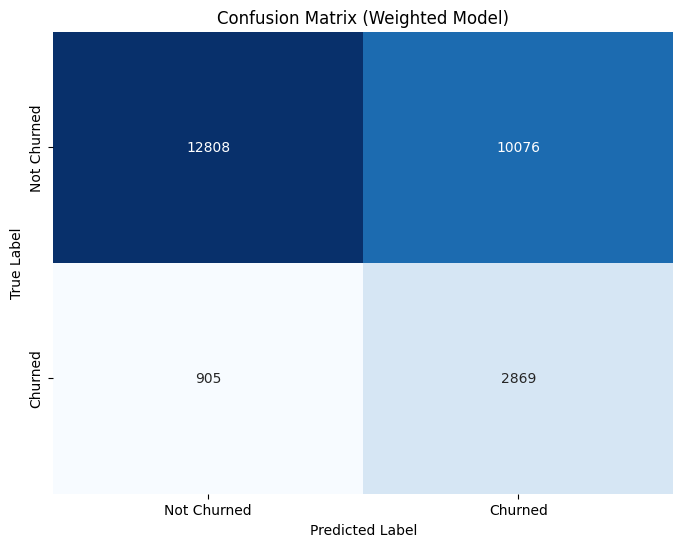

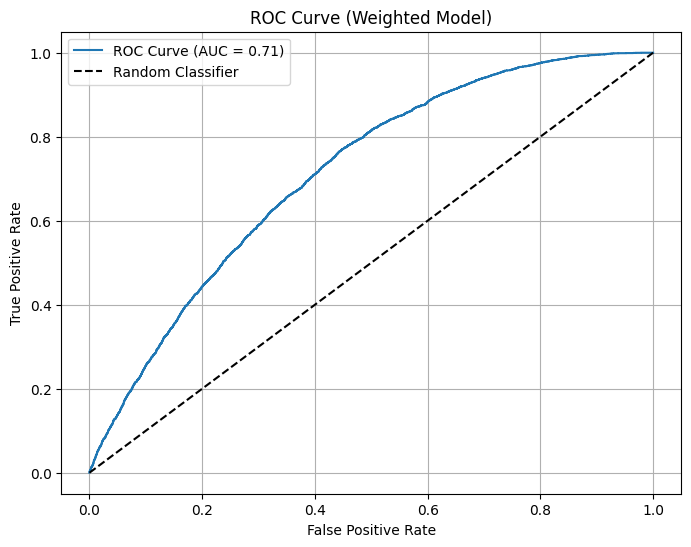

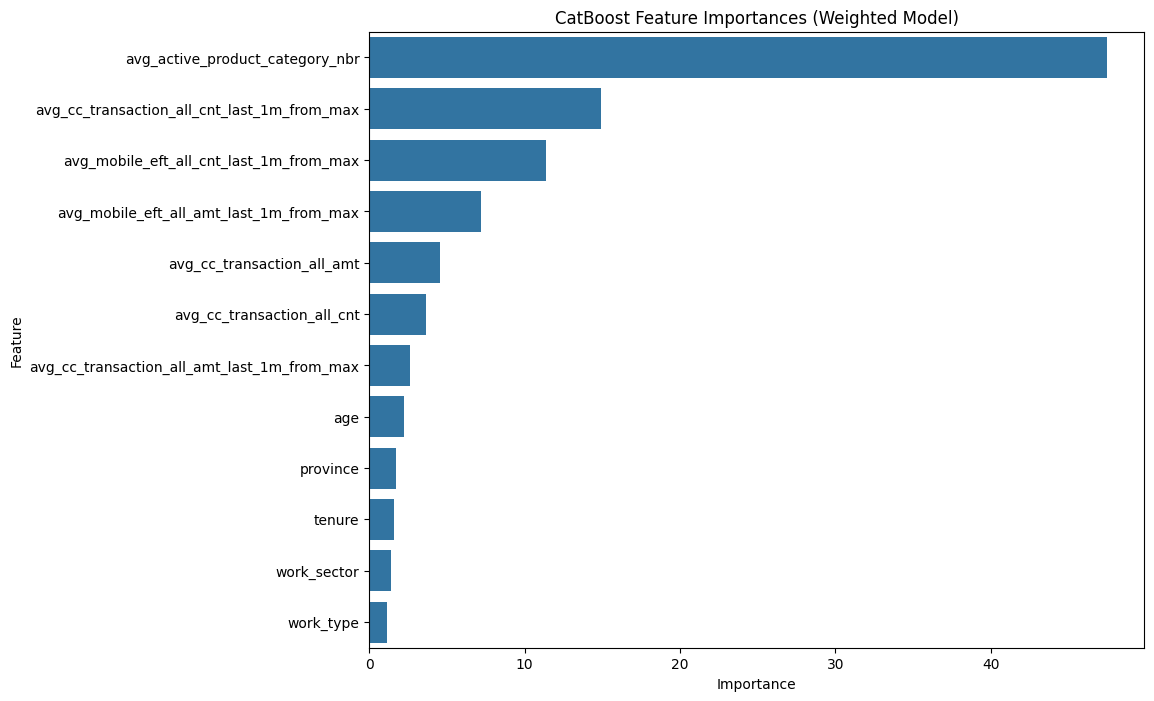

,feature,importance
7,avg_active_product_category_nbr,47.502497
11,avg_cc_transaction_all_cnt_last_1m_from_max,14.930615
8,avg_mobile_eft_all_cnt_last_1m_from_max,11.388835
9,avg_mobile_eft_all_amt_last_1m_from_max,7.184224
5,avg_cc_transaction_all_amt,4.570368
6,avg_cc_transaction_all_cnt,3.664636
10,avg_cc_transaction_all_amt_last_1m_from_max,2.625321
0,age,2.261473
1,province,1.727157
4,tenure,1.619762


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set using the weighted model
y_pred_weighted = cat_model_weighted.predict(X_test)
y_pred_proba_weighted = cat_model_weighted.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the weighted model
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
precision_weighted = precision_score(y_test, y_pred_weighted)
recall_weighted = recall_score(y_test, y_pred_weighted)
f1_weighted = f1_score(y_test, y_pred_weighted)
roc_auc_weighted = roc_auc_score(y_test, y_pred_proba_weighted)

print(f"\nWeighted Model Evaluation on Test Set:")
print(f"Accuracy:  {accuracy_weighted:.4f}")
print(f"Precision: {precision_weighted:.4f}")
print(f"Recall:    {recall_weighted:.4f}")
print(f"F1-Score:  {f1_weighted:.4f}")
print(f"ROC AUC:   {roc_auc_weighted:.4f}")

# Confusion Matrix for weighted model
cm_weighted = confusion_matrix(y_test, y_pred_weighted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix (Weighted Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve for weighted model
fpr_weighted, tpr_weighted, thresholds_weighted = roc_curve(y_test, y_pred_proba_weighted)
plt.figure(figsize=(8, 6))
plt.plot(fpr_weighted, tpr_weighted, label=f'ROC Curve (AUC = {roc_auc_weighted:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Weighted Model)')
plt.legend()
plt.grid()
plt.show()

# Feature Importances for weighted model
feature_importances_weighted = pd.DataFrame({'feature': X.columns, 'importance': cat_model_weighted.get_feature_importance()})
feature_importances_weighted = feature_importances_weighted.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_weighted)
plt.title('CatBoost Feature Importances (Weighted Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

display(feature_importances_weighted.head(10))